
<h1 align="center">Mobina Pournemat</h1>
<h1 align="center">97105833</h1>

### Avoid showing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fft import fft, ifft, fftshift
from scipy.signal import resample, butter , sosfilt
import control

# Question 1

## **Part 1**

<div dir="rtl">
در ابتدا هر دو فایل صوتی را می خوانیم و در متغیر هایی ذخیره می کنیم و از هر دو فایل با نرخ نمونه برداری 80000 نمونه برداری می کنیم؛ سپس هر دو را به حوزه فرکانس می بریم (با استفاده از تبدیل فوریه)
حالا طبق صورت سوال، باید فایل صوتی اول را در حوزه فرکانس شیفت دهیم و سیگنال شیفت داده شده آن را با استفاده از عکس تبدیل فوریه به حوزه زمان برگردانیم.
در نهایت اگر شیفت داده شده فایل اول را ذخیره کنیم و به آن گوش دهیم متوجه میشویم که صدایی شنیده نمی شود.

</div>

In [3]:
sample_rate_1, raw_1= wavfile.read("music1.wav")
sample_rate_2, raw_2= wavfile.read("music2.wav")

In [4]:
sample_1 = resample(np.float64(raw_1) , round(len(raw_1)*80000/sample_rate_1))
sample_2 = resample(np.float64(raw_2) , round(len(raw_1)*80000/sample_rate_2))

### **music1 in time domain representation**

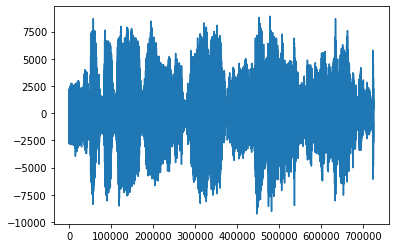

In [5]:
plt.plot(sample_1)

In [6]:
fourie_1 = fft(sample_1)
fourie_2 = fft(sample_2)

### **music1 in frequency domain representation**

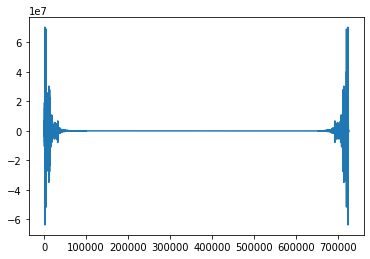

In [7]:
plt.plot(fourie_1)

In [8]:
shifted_fourie_1 = fftshift(fourie_1)
shifted_sample_1 = ifft(shifted_fourie_1)

### **music1 after frequency shift in frequency domain**

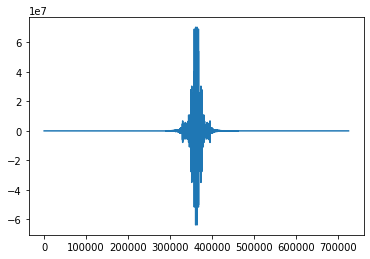

In [9]:
plt.plot(shifted_fourie_1)

### **music1 after frequency shift in time domain**

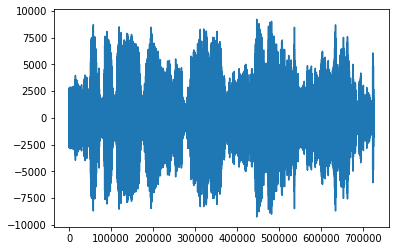

In [10]:
plt.plot(shifted_sample_1)

In [11]:
wavfile.write("Part1_shifted_music1.wav",80000 ,shifted_sample_1.astype(np.int16))

In [16]:
for i in range(5):
    print(sample_1[i])

1089.9999999999986
1181.4703053439
1341.37068569901
1490.4394673398433
1564.330546027392


In [17]:
for i in range(5):
    print(shifted_sample_1[i])

(1090.0000000000002-1.64285207698176e-13j)
(-1181.4703053439007-1.589136509498903e-12j)
(1341.3706856990111+1.8643974579319154e-12j)
(-1490.4394673398447-7.69114275273022e-13j)
(1564.3305460273948+5.43934043993851e-13j)


<div dir="rtl">
همانطور که می بینید در این فایل صدایی پخش نمی شود. اگر مقادیر این دو سیگنال در حوزه زمان را مقایسه کنیم به این نکته پی میبریم که در سیگنال شیفت داده شده، مقادیر یکی در میان مثبت و منفی هستند که هم محور کردن فرکانس ها حول صفر  باعث این موضوع شده است که البته در شکل ها مشخص نیست چون سرعت نوسان ها بیشتر شده است. علاوه براین همان طور که مشاهده می شود سیگنال شیفت خورده در حوزه فرکانس، فرکانس هایی را شامل می شود که بیش از 20000 هرتز هستند. یعنی در محدوده شنوایی انسان نیستند. در نتیجه این عامل باعث می شود که در فایل شیفت داده شده صدایی شنیده نشود. 
</div>

## **Part 2**

In [20]:
sum_of_musics_f = shifted_fourie_1 + fourie_2
sum_of_musics_t = ifft(sum_of_musics_f)
wavfile.write("Part2_sum_of_musics.wav",80000 ,sum_of_musics_t.astype(np.int16))

<div dir="rtl">
همانطور که مشاهده می شود در سیگنال حاصل جمع شیفت خورده سیگنال اول با سیگنال دوم، فقط صدای سیگنال دوم شنیده می شود. چراکه همان طور که در بخش قبل اشاره شد، شیفت خورده سیگنال اول شنیده نمی شود.
</div>

## **Part 3**

In [23]:
shifted_sum_f = fftshift(sum_of_musics_f)
shifted_sum_t = ifft(shifted_sum_f)
wavfile.write("Part3_shifted_sum.wav",80000,shifted_sum_t.astype(np.int16))

<div dir="rtl">
در این حالت فقط صدای سیگنال اول شنیده می شود. چون با این شیفت، سیگنال اول به حالت اولیه خود باز می گردد ولی سیگنال دوم شیفت می خورد و مانند حالتی که در بخش اول برای سیگنال اول اتفاق افتاد ، برایش پیش می آید و در نتیجه قابل شنیدن نخواهد بود. در واقع علت شنیده نشدن صداها این است که فرکانس آن ها در محدوده ی شنوایی انسان (20 تا 20000 هرتز) نیست!
</div>

# Question 2

## **Part 1**

<div dir="rtl">
پاسخ این بخش در فایل Q2_part1.pdf قرار داده شده.
</div>

## **Part 2**

<div dir="rtl">
تابع زیر یک بردار (vector) را ورودی می گیرد و در خروجی DFT متناظر با آن را برمی گرداند. برای بررسی درستی عملکرد تابع،یک بردار رندوم به تابع داده می شود و در نهایت خروجی تابع با مقدار واقعی fft آن بردار (که با استفاده از توابع کتابخانه numpy محاسبه شده) مقایسه می شود و اگر fft به درستی محاسبه شده باشد در خروجی True چاپ می شود.
<div>

In [51]:
def fft(vector):
    vector = np.asarray(vector)
    n = np.arange(vector.shape[0])
    k = n.reshape((vector.shape[0], 1))
    exp = np.exp(-2j * np.pi * k * n / vector.shape[0])
    return np.asarray([np.dot(exp[i] , x) for i in range(vector.shape[0])])

vec = [0.07005494, 0.17788842, 0.19568626, 0.71750615, 0.11083469]
np.allclose(fft(vec) , np.fft.fft(vec))

True

## **Part 3**

In [60]:
def ifft(vec):
    vec = np.asarray(vec)
    n = np.arange(vec.shape[0])
    k = n.reshape((vec.shape[0], 1))
    exp = np.exp(2j * np.pi * k * n / vec.shape[0])
    return np.asarray([np.dot(exp[i] , vec) for i in range(vec.shape[0])])/vec.shape[0]

vec = [0.07005494, 0.17788842, 0.19568626, 0.71750615, 0.11083469]
np.allclose(ifft(fft(vec)), vec)

True

## **Part 4**

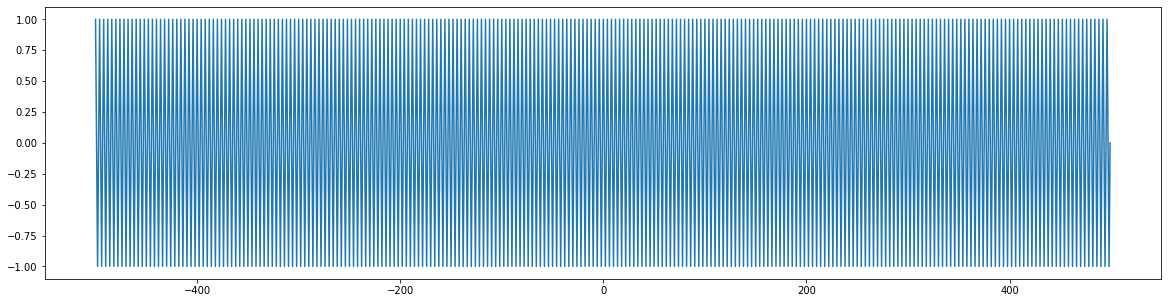

In [83]:
n = np.arange(-500, 500, 1)
x_t = np.cos(np.pi * n * 1/2)
_, ax = plt.subplots(figsize=(20, 5))
ax.plot(n, x_t)

## **Part 5**

<div dir="rtl">
اگر تابع Cos را با استفاده از قاعده اویلر به صورت توابع نمایی باز نویسی کنیم و سپس از رابطه تبدیل فوریه سیگنال های پریودیک  استفاده کنیم، رابطه زیر حاصل می شود:
</div>

$$X(j\omega) = \pi (\delta (\omega - \pi) + \delta(\omega + \pi))$$

## **Part 6**

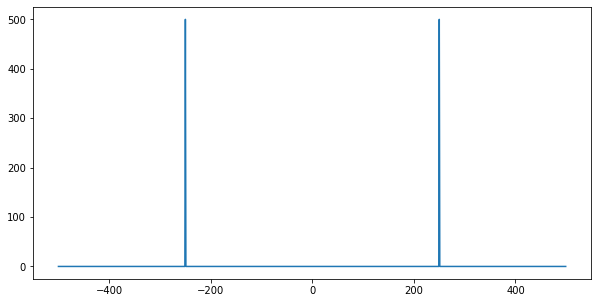

In [71]:
x_w = fft(x_t)
_ , ax = plt.subplots(figsize=(10, 5))
ax.plot(n,x_w)

<div dir="rtl">
همانطور که مشاهده می شود نمودار بخش 6 مطابق با معادله به دست آمده در بخش 5 است.
</div>

## **Part 7**

In [91]:
x_t_prim = ifft(x_w)
np.allclose(x_t,x_t_prim)
print(x_t[:5])
print(x_t_prim[:5])

[ 1.00000000e+00 -1.81204398e-14 -1.00000000e+00  7.33983405e-15
  1.00000000e+00]
[ 1.00000000e+00+1.23914411e-13j -1.39987775e-14+9.88592061e-14j
 -1.00000000e+00-5.24232293e-14j  5.66315947e-14-1.71903941e-13j
  1.00000000e+00-5.01375492e-14j]


<div dir="rtl">
همان طور که مشاهده می شود سیگنال اولیه x(t) با سیگنال به دست آمده در اثر اعمال fft و ifft برابر است. 
</div>

## **Part 8**

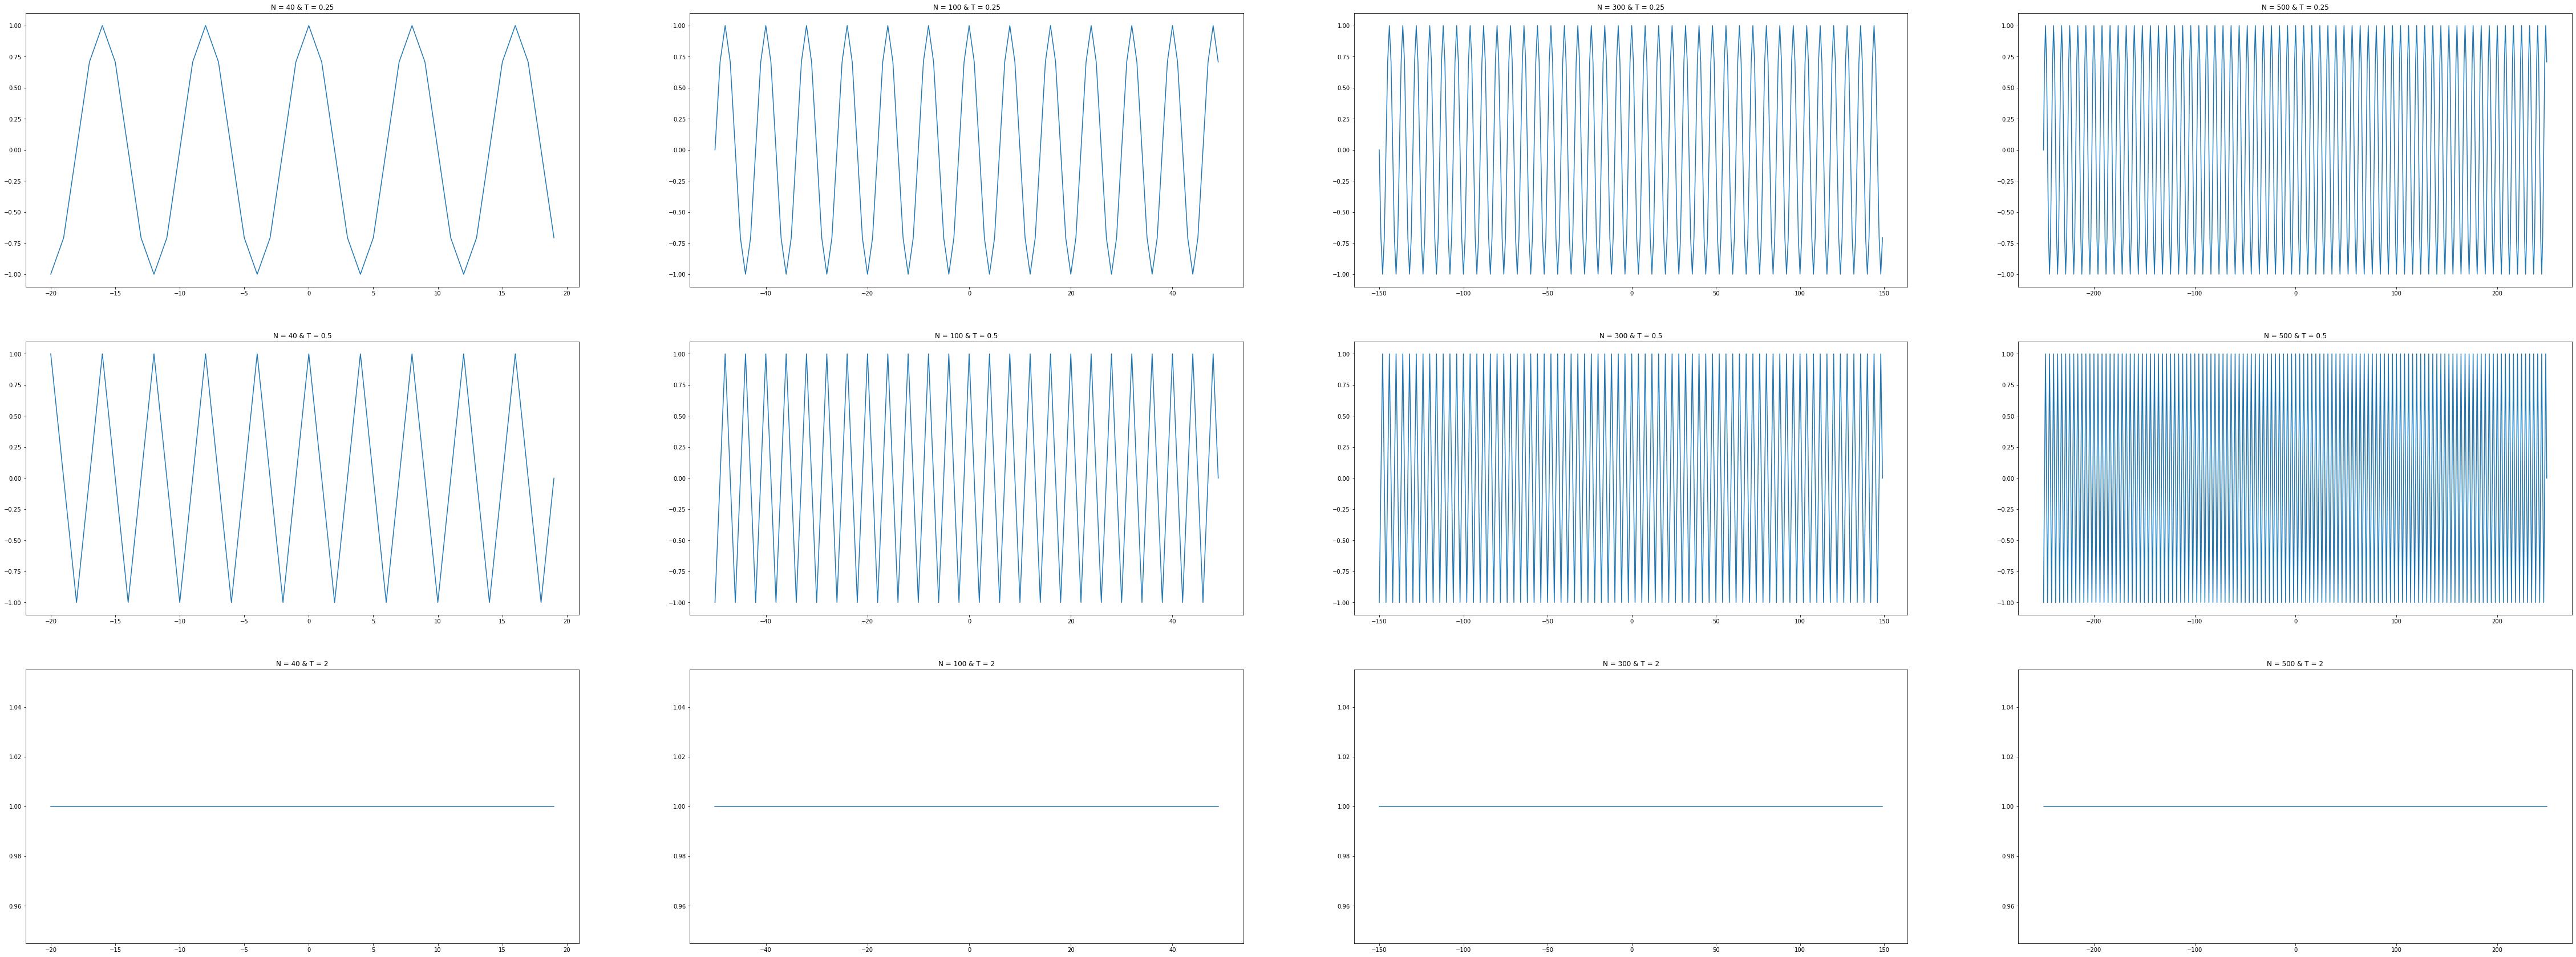

In [103]:
T, N = [1/4 , 1/2, 2], [40, 100, 300, 500]
num_rows, num_cols = len(T), len(N)
_, ax = plt.subplots(nrows = num_rows, ncols = num_cols, figsize=(20 * num_cols, 10 * num_rows))
for i in range(num_rows):
    for j in range(num_cols):
        t, nn = T[i], N[j]
        n = np.arange(-nn//2,nn//2,1)
        x_t = np.cos(np.pi * n * t)
        ax[i][j].set_title("N = " + str(nn) + " & T = " + str(t))
        ax[i][j].plot(n, x_t)

<div dir="rtl">
همان طور که نمودار ها مشخص است، عامل اصلی تعیین کننده ی شکل نمودار ها پارامتر T است؛ اگر چه پارامتر N نیز تاثیرگذار است ولی با مقایسه نمودار های هر سه سطر می توان دریافت که پارامتر T تعیین کننده ی شکل کلی نمودار هاست
</div>

# Question 3

<div dir="rtl">
ابتدا فایل های صوتی را در متغیر های محلی لود می کنیم.
</div>

In [4]:
clean1, clean1_ = wavfile.read("clean1.wav") 
distorted1, distorted1_ = wavfile.read("distorted1.wav") 
distorted2, distorted2_ = wavfile.read("distorted2.wav") 

## **Signals representation in time domain**

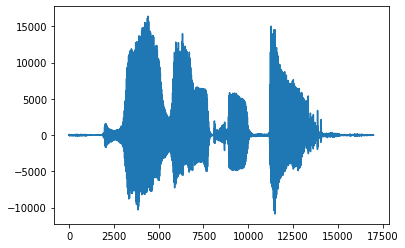

In [8]:
plt.plot(clean1_)

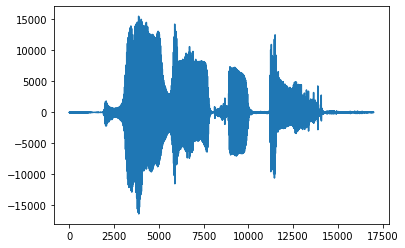

In [9]:
plt.plot(distorted1_)

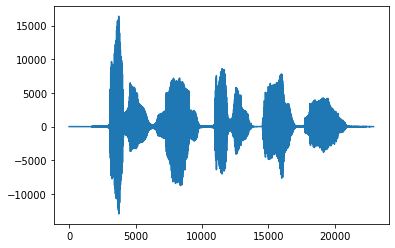

In [12]:
plt.plot(distorted2_)

## **Signals representation in frequency domain**

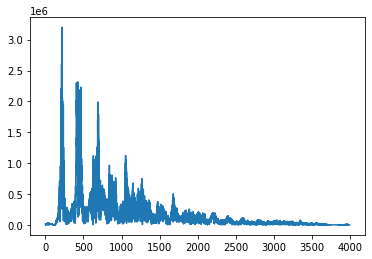

In [19]:
temp = (np.abs(np.fft.rfft(clean1_[:])))
f = (clean1/2) * np.linspace(0,1,len(temp))
temp = temp[:np.size(f)]
plt.plot(f,temp)

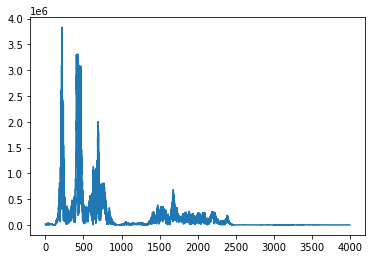

In [20]:
temp = (np.abs(np.fft.rfft(distorted1_[:])))
f = (distorted1/2) * np.linspace(0,1,len(temp))
temp = temp[:np.size(f)]
plt.plot(f,temp)

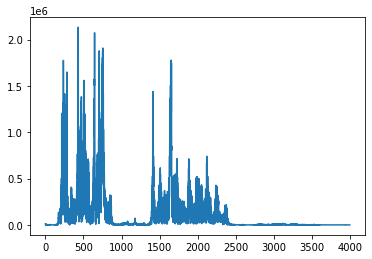

In [21]:
temp = (np.abs(np.fft.rfft(distorted2_[:])))
f = (distorted2/2) * np.linspace(0,1,len(temp))
temp = temp[:np.size(f)]
plt.plot(f,temp)

<div dir="rtl">
با توجه به نمودار ها می توان دریافت که فرکانس های حدود 700 تا 1400 تضعیف شده اند. برای اینکه این اثر تضعیفی را معکوس کنیم، باید تابع انتقال سیستم (پاسخ به ضربه) را محاسبه کنیم و سپس با تقسیم کردن تبدیل فوریه سیگنال distorted2 بر پاسخ به ضربه در حوزه فرکانس، ورودی سیستم را به دست آوریم.
</div>

<div dir="rtl">
توجه داریم که در برخی نقاط، مقادیر مخرج خیلی کوچک می شوند که منجر به تولید مقادیر خیلی بزرگ در اثر تقسیم می شوندکه این مقادیر فرکانس های بالا را تشکیل می دهند و در نتیجه یک صدای سوت در پس زمینه ایجاد می شود. برای رفع این مشکل، در تمامی نقاط مقدار H را با یک عدد ثابت کوچکی جمع می کنیم تا حاصل تقسیم اعداد بسیار بزرگ نشود.  
</div>

$$H(j\omega) = \frac{Y_1 (j \omega)}{X_1 (j \omega)}$$
$$X_2 = \frac{Y_2 (j\omega)}{H(j\omega)}$$

In [44]:
H = (np.fft.rfft(distorted1_[:]))/(np.fft.rfft(clean1_[:]))
H = resample(H , round(len(distorted2_)/2)+1)
clean2 = np.fft.rfft(distorted2_)/(H + 0.03)
output = np.fft.irfft(clean2)
wavfile.write("recovered2.wav",8000 ,out.astype(np.int16))

<div dir="rtl">
مقادیر ثابت مختلفی برای اضافه شدن به H تست شدند و نهایتا مقدار 0.3 بهترین نتیجه را داشت
</div>

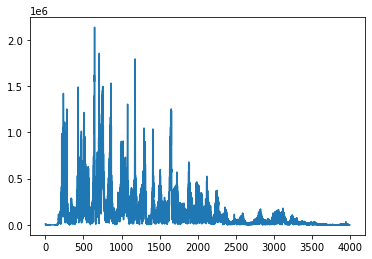

In [45]:
temp = (np.abs(np.fft.rfft(output[:])))
f = (distorted2/2) * np.linspace(0,1,len(temp))
temp = temp[:np.size(f)]
plt.plot(f,temp)

<div dir="rtl">
همانطور که مشاهده می شود فرکانس های 700 تا 1400  که سیستم آن ها را ضعیف کرده بود تقویت شده اند.
</div>

# Question 4

<div dir="rtl">
ابتدا فایل موردنظر را در متغیر های محلی لود می کنیم.
</div>

In [5]:
noisy, noisy_= wavfile.read("noisy1.wav")

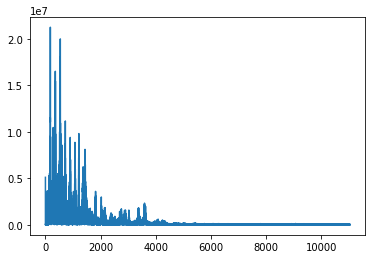

In [68]:
fft_spectrum = (np.abs(np.fft.rfft(noisy_[:])))
f = (noisy/2) * np.linspace(0,1,len(fft_spectrum))
fft_spectrum = fft_spectrum[:np.size(f)]
plt.plot(f,fft_spectrum)

<div dir="rtl">
با توجه به نمایش سیگنال در حوزه فرکانس، می توان حدس زد که نویز موجود، تصادفی است و در همه ی فرکانس ها اثر یکسانی میگذارد. در نتیجه فرکانس هایی که دامنه بیشتری نسبت به سایر فرکانس ها دارند، احتمالا فرکانس های اصلی هستند و مابقی را می توان نویز در نظر گرفت و با یک فیلتر حذف کرد.
با توجه به نمودار بالا می توان فهمید که باید از فیلتر Bandpass استفاده کرد.  برای ایجاد فیلتر Bandpass سعی می کنیم دو مرز برای این فیلتر پیدا کنیم. با استفاده از قطعه کد زیر محل رخداد اولین و آخرین باری که دامنه فرکانسی از 4000000 بیشتر شده است را به دست می آوریم. 
</div>

In [29]:
start , end = -1 , -1
for i in range(len(fft_spectrum)-1):
    if (fft_spectrum[i+1]>4000000):
        start = f[i+1] if start == -1 else start
        end = f[i+1]

print(start)
print(end)

129.98475
1458.2216250000001


<div dir="rtl">
با توجه به نتیجه کد بالا دو مرزی که برای فیلتر Bandpass انتخاب می کنیم 130 و 1460 خواهد بود.
<div>

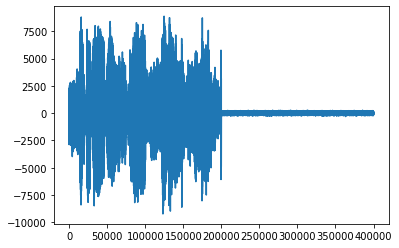

In [28]:
wc = np.array([130,1460])*2/noisy
filtered=sosfilt(butter(5,wc,btype='bandpass',output="sos") ,noisy_)
wavfile.write("denoise1.wav", noisy,filtered.astype(np.int16))
plt.plot(noisy_)

<div dir="rtl">
همان طور که مشخص است، در فایل جدید صدای نویز حذف شده و فیلتر Bandpass تولید شده به درستی کار کرده است. علاوه بر این در نمایش سیگنال جدید در حوزه فرکانس نیز مشاهده می کنیم که فرکانس هایی که نویز را ایجاد می کردند تا حد خوبی حذف شده اند 
<div>

# Question 5

<div dir="rtl">
با این فرض که در عبارت داده شده در صورت سوال ایرادی وجود دارد، عبارت H(jw) مطابق زیر فرض شده است:
</div>

$$H(j\omega) = \frac{(j\omega)^2 + 2 j\omega + 10}{(j\omega)^3 + 25 (j\omega)^2 + 1.9 \times 10^6 (j\omega) + 10}$$

In [6]:
H = control.TransferFunction([1,2,10], [1,25,1.9*10**6,10])
print(H)


       s^2 + 2 s + 10
-----------------------------
s^3 + 25 s^2 + 1.9e+06 s + 10



<div dir="rtl">
حالا با استفاده از پکیج Control نمودار Bode را رسم می کنیم:
</div>

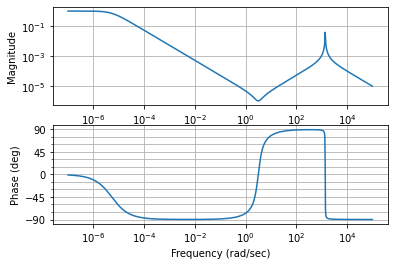

In [7]:
magnitude, phase, w = control.bode(H)

<div dir="rtl">
در این بخش با استفاده از کتابخانه Control قطب ها و صفر ها را به دست می آوریم.
</div>

In [8]:
poles = control.pole(H)
print("Poles=",poles)

Poles= [-1.24999974e+01+1378.34819619j -1.24999974e+01-1378.34819619j
 -5.26315790e-06   +0.j        ]


In [9]:
zeroes = control.zero(H)
print("Zeroes=",zeroes)

Zeroes= [-1.+3.j -1.-3.j]


<div dir="rtl">
 نمودار زیر محل قطب ها و صفر ها را نشان می دهد: 
</div>

(array([-1.24999974e+01+1378.34819619j, -1.24999974e+01-1378.34819619j,
        -5.26315790e-06   +0.j        ]),
 array([-1.+3.j, -1.-3.j]))

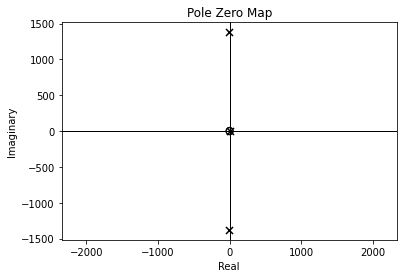

In [10]:
control.pzmap(H)

<div dir="rtl">
حالا بدون استفاده از پکیج Control این کار را انجام می دهیم:
</div>

In [18]:
def H(w):
    nom = (1j*w)**2 + 2j*w+10
    denom = (1j*w)**3 + 25 * (1j*w)**2 + 1.9 * 10**6 * 1j*w + 10
    return nom / denom

<div dir="rtl">
در ادامه نمودار های Bode متناظر را می بینیم:
</div>

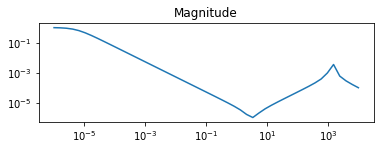

In [21]:
w = np.logspace(-6 , 4)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Magnitude")
ax.plot(w , np.abs(H(w)))


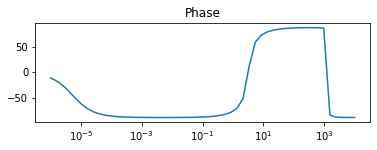

In [22]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.set_xscale('log')
ax.set_title("Phase")
ax.plot(w , np.angle(H(w))*180/(np.pi))

<div dir="rtl">
در ابتدا از $\omega = 5.26316 \times 10^{-6}$ تا $\omega = \sqrt{10}$ اندازه با شیب $20 dB/dec$ کاهش می یابد که ریشه مختلط و عامل underdamped شده در صورت به وجود می آورد و باعث افزایش شیب $40 dB/dec$ می شود و شیب نمودار Magnitude آنرا از -20 به 20 میرساند و زاویه از -90 به 90 افزایش می یابد. در ادامه در حدود $\omega = 1378.4$ که قطب مختلف و عامل underdamped در مخرج به وود اورده می توان دریافت که شیب از 20 به -20 کاهش یافته و به این ترتیب زاویه نیز از 90 به -90 میرسد.
</div>

$$H(s) = ((\frac{s}{\sqrt{10}})^2 + 2 \times \frac{1}{\sqrt{10}} \times \frac{s}{\sqrt{10}} + 1 ) \times (1 + \frac{s}{5.26316 \times 10^{-6}})^{-1} \times ((\frac{s}{1378.4})^2 + 2 \times 0.009068 \times (s/1378.8) + 1)^{-1}$$